In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division
from scipy.io import loadmat
from collections import defaultdict

In [2]:
digits = loadmat('./data/digits.mat')
X_train = digits['X']
y_train = np.squeeze(digits['y'])
y_train = np.where(y_train == 10, 0, y_train)

In [3]:
X_train.shape, y_train.shape

((5000, 400), (5000,))

In [4]:
index = 5

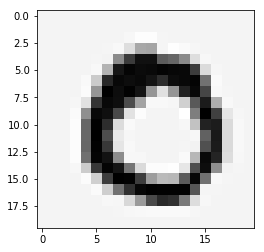

In [5]:
some_digit = X_train[index].reshape(20, 20).T
plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

In [6]:
np.unique(y_train[index])

array([0], dtype=uint8)

In [10]:
n_class = len(np.unique(y_train))

X = tf.placeholder(dtype='float32', shape=X_train.shape, name='X')
Y = tf.placeholder(dtype='float32', shape=(len(y_train), 1), name='Y')

thetas = tf.Variable(np.zeros(dtype='float32', shape=(X_train.shape[1], 1)), name='thetas')
bias = tf.Variable(np.zeros(dtype='float32', shape=[1]), name='bias')

z = tf.matmul(X, thetas) + bias  
sigmoid =  tf.div(1.0, 1.0 + tf.exp(-z))
cost_function = tf.reduce_mean(-(Y * tf.log(sigmoid)) - (1-Y) * tf.log(1-sigmoid))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost_function)

classifiers = np.zeros(shape=(n_class, X_train.shape[1] + 1))
probabilities = np.zeros(shape=(X_train.shape[0], n_class))

with tf.Session() as sess:    
    for n in range(n_class):
        sess.run(tf.global_variables_initializer())
        
        y_train_tmp = y_train == n
        feed_dict = {X: X_train, Y: y_train_tmp.reshape(-1, 1)}
        
        for step in range(5000):
            _, cost = sess.run([optimizer, cost_function],  feed_dict)
            
        classifiers[n, :] = np.concatenate([np.matrix(sess.run(bias)), np.matrix(sess.run(thetas).T)], axis=1)
        probabilities[: 1] = sess.run(sigmoid, feed_dict)
            

ValueError: could not broadcast input array from shape (5000,1) into shape (1,10)